# Convolutional Neural Networks (CNNs) for Classification

Convolutional Neural Networks are particularly useful for data with spatial relationships, or data where preservation of position is important (images, time series, spectra, etc.)

### Background

CNNs use:
- **Convolution**: Apply filters to detect local patterns
- **Pooling**: Reduce dimensionality while preserving important features
- **Fully connected layers**: Make final classification decisions

CNNs are excellent for:
- Image classification (satellite images, microscope images)
- Spectral data classification 
- Time series data with local patterns

## Convolution operation
The eponymous convolution operation performed in CNNs is simply multiplying the data by a kernel of values.   
The values in the kernel are learned during network training to extract relevant feature in the image for   
the given classification problem. The more convolutions in the network, the more features that can be extracted.

### Convolution
![Convolution Operation](/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/04_NN_Image_Classification/files/convolution_operation.gif) 
  
### Convolution with padding 
![Conv with Padding](/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/04_NN_Image_Classification/files/same_padding_no_strides_transposed.gif) 
  
The empty dashed squares in the above animation are the "padding".  
This helps avoid annoying black framing that can show up in convolved images. There are different ways to pad an image:
#### Modes (affect output image size)
- 'same': Padding is added to maintain the same spatial dimensions as the input. The amount of padding is calculated to ensure the output has the same width and height as the input.
- 'valid': No padding is applied. The convolution is only computed where the filter fully overlaps with the input, resulting in output dimensions smaller than the input.
- 'full': Padding is applied such that the filter has at least one element overlapping with the input, resulting in output dimensions larger than the input.
#### How to fill the padded values
- 'zeros': Padded elements are filled with zeros (most common approach).
- 'reflect': Padded elements mirror the values at the edge of the input (edge pixels are reflected).
- 'replicate' or 'edge': Padded elements are copies of the edge values of the input.
- 'circular' or 'wrap': Padded elements wrap around to the opposite side of the input (treats the image as if it tiles infinitely).

Some of these fill choice will end up being the same depending on how much padding is applied to the image.

A "convolution block" will typically have a convolution operation followed by a pooling operation.

Pooling is a way to reduce the output of a convolution operation in size.  
Typically, max pooling is used, selecting the maximum value of the output convolution.

![max pooling](/Users/phillipsm/Documents/Teaching/AI_in_PlanetaryXXX/Code/04_NN_Image_Classification/files/max_pool_operation.gif)

### Example: 2D CNN for Image Classification

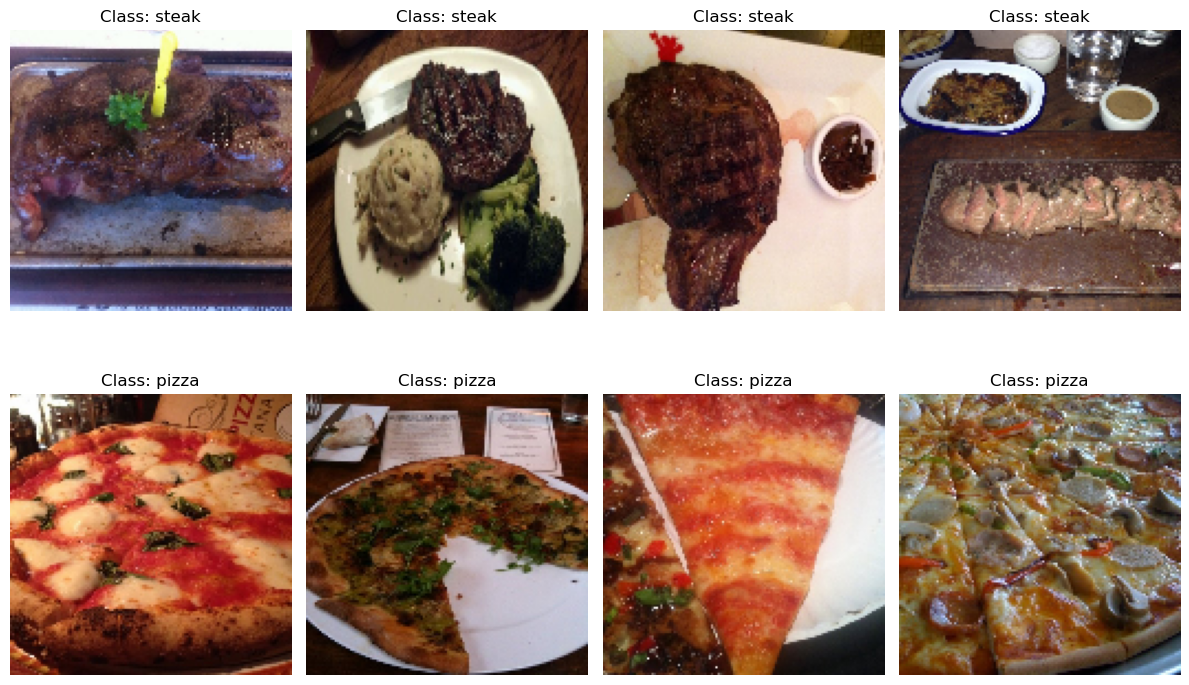

Epoch 1/50


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.6063 - loss: 0.8562 - val_accuracy: 0.9677 - val_loss: 0.0692
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.7740 - loss: 0.4261 - val_accuracy: 1.0000 - val_loss: 0.0352
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9529 - loss: 0.2139 - val_accuracy: 1.0000 - val_loss: 0.0301
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9451 - loss: 0.1843 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9620 - loss: 0.1217 - val_accuracy: 0.9677 - val_loss: 0.0480
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0738 - val_accuracy: 0.9677 - val_loss: 0.0440
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9705 - loss: 0.0872 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0387
Epo

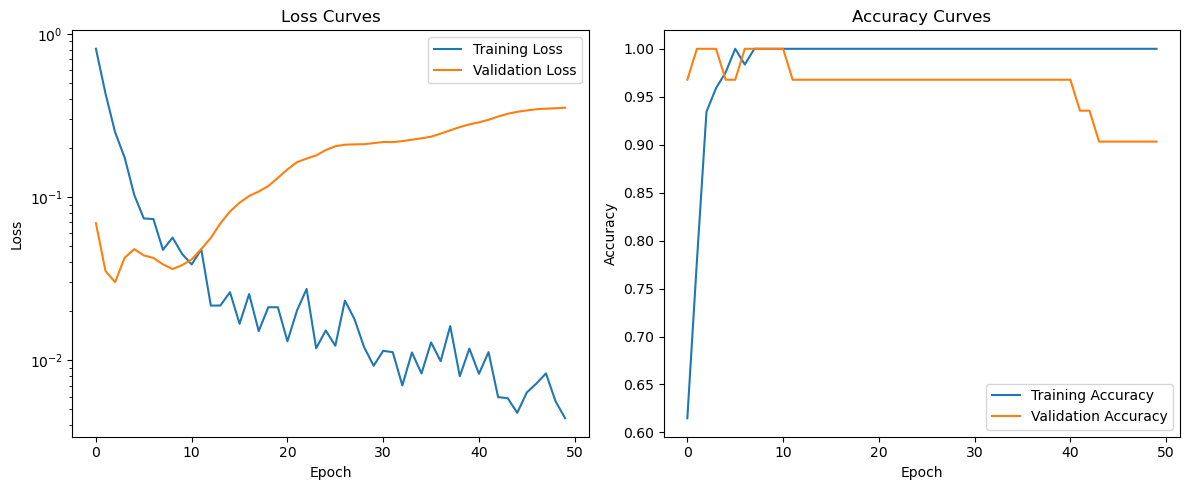

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2D CNN Accuracy: 0.7272727272727273

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        25
           1       0.77      0.53      0.62        19

    accuracy                           0.73        44
   macro avg       0.74      0.70      0.71        44
weighted avg       0.74      0.73      0.72        44



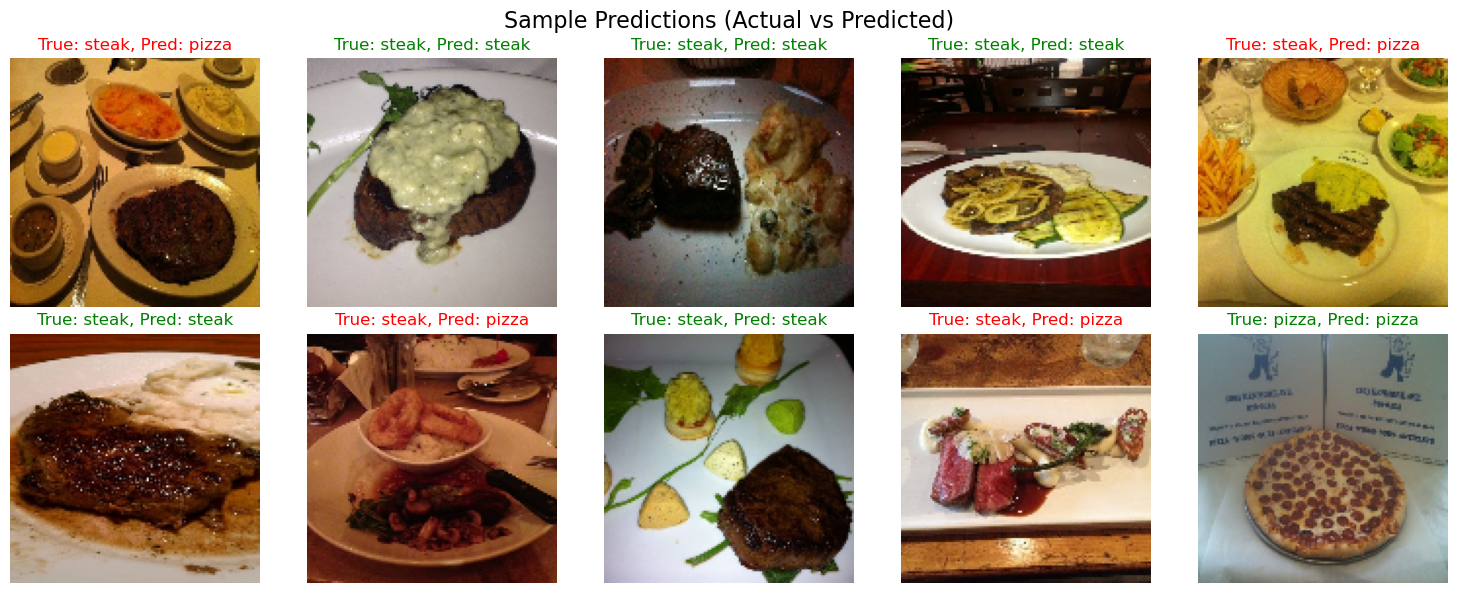

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from utils.utils import load_images_from_folder

# Define paths
base_dir = "data/pizza_steak_sushi"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions - adjust as needed for your model
img_height = 128
img_width = 128

X_train_img, y_train_labels = load_images_from_folder(train_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])
X_test_img, y_test_labels = load_images_from_folder(test_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])

# Convert string labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

# Display some example images
plt_i = 0
plt.figure(figsize=(12, 8))
for i in range(int(len(y_train_encoded)/2) - 5, int(len(y_train_encoded)/2) + 3): 
    plt.subplot(2, 4, plt_i+1)
    # Display the unnormalized image for better visualization
    img = X_train_img[i].copy()
    # Reverse preprocessing for display
    img = img / 256  # Approximate reverse of preprocessing
    plt.imshow(img)
    plt.title(f"Class: {label_encoder.classes_[y_train_encoded[i]]}")
    plt.axis('off')
    plt_i += 1
plt.tight_layout()
plt.show()

# Build the 2D CNN model (with L2 regularization)
def create_2d_cnn_model(input_shape):
    
    model = Sequential([
        # First convolutional block
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
               input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Third convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        # Dense layers
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    

    # Compile with binary crossentropy loss
    model.compile(
        optimizer=Adam(learning_rate=0.00005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the 2D CNN model
cnn_2d_model = create_2d_cnn_model((img_height, img_width, 3))
history = cnn_2d_model.fit(
    X_train_img, y_train_encoded,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the 2D CNN model
y_pred_proba = cnn_2d_model.predict(X_test_img)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("2D CNN Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions (Actual vs Predicted)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    idx = i + 10  # Skip the first few for variety
    ax.imshow(X_test_img[idx].reshape(img_height, img_width, 3) / 256)
    pred_class = int(y_pred[idx])
    true_class = int(y_test_encoded[idx])
    
    color = 'green' if pred_class == true_class else 'red'
    ax.set_title(f"True: {label_encoder.classes_[true_class]}, Pred: {label_encoder.classes_[pred_class]}", color=color)
    ax.axis('off')

# set first axis to logy
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Add regularization

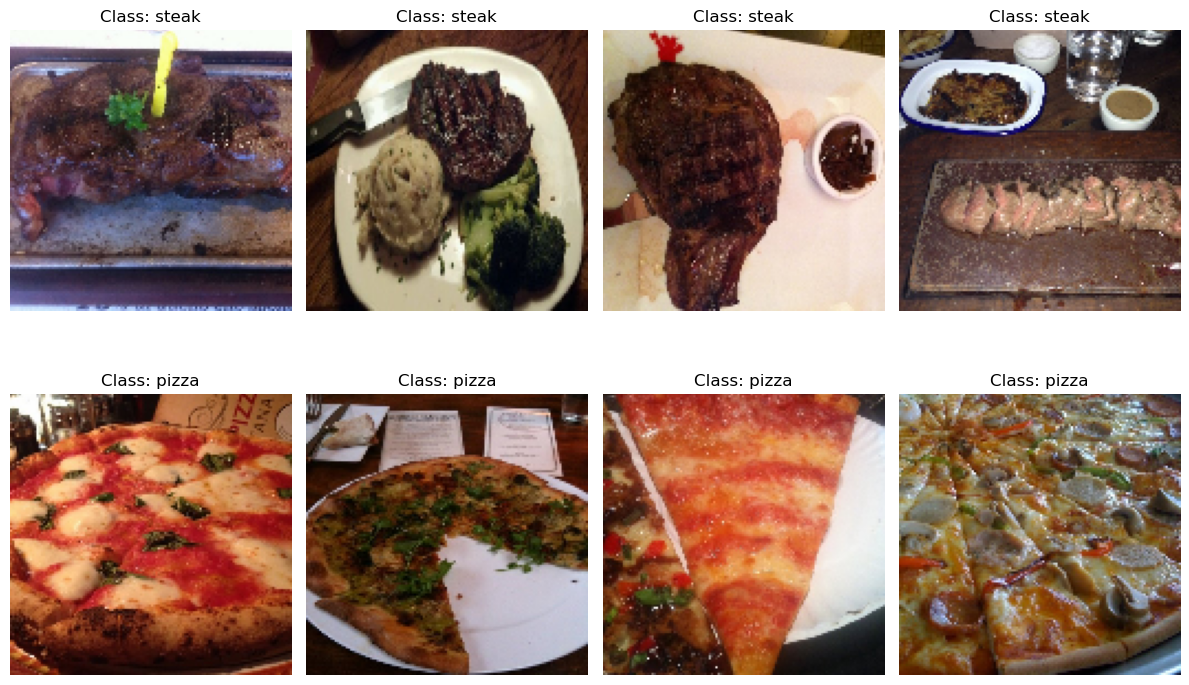

Epoch 1/100


/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/phillipsm/anaconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.5440 - loss: 3.4799 - val_accuracy: 0.5161 - val_loss: 4.1396 - learning_rate: 5.0000e-05
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6669 - loss: 3.3303 - val_accuracy: 0.5161 - val_loss: 3.5573 - learning_rate: 5.0000e-05
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.7012 - loss: 3.3446 - val_accuracy: 0.4839 - val_loss: 3.4501 - learning_rate: 5.0000e-05
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7160 - loss: 3.1809 - val_accuracy: 0.6129 - val_loss: 3.4089 - learning_rate: 5.0000e-05
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.8195 - loss: 3.0309 - val_accuracy: 0.5806 - val_loss: 3.3358 - learning_rate: 5.0000e-05
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.7843 - loss: 3.1486 - val_accuracy: 0.7097 - val_loss: 3.1759 - learning_rate: 5.0000e-05
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8475 - loss: 2.98

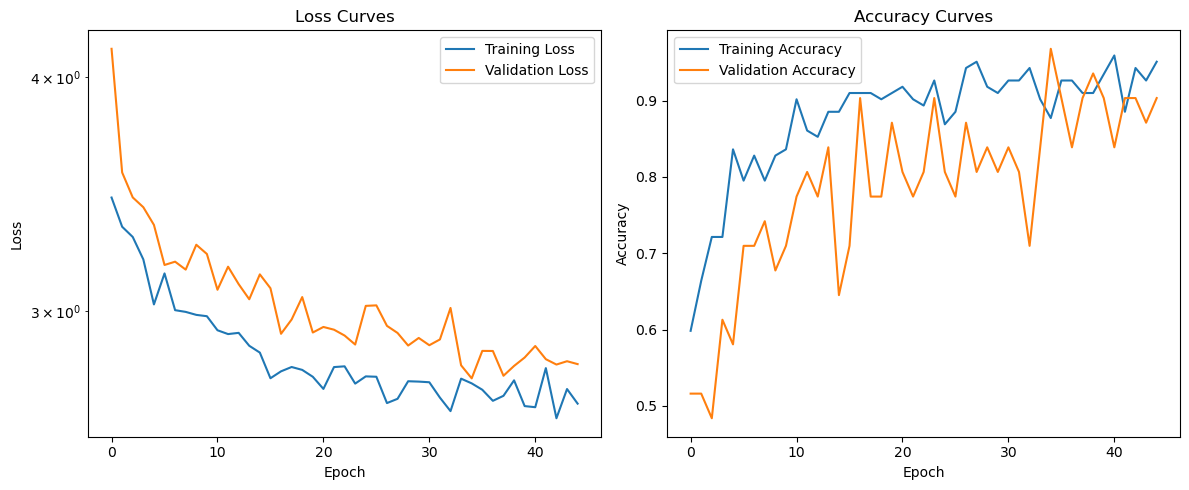

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2D CNN Accuracy: 0.8181818181818182

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.92      0.63      0.75        19

    accuracy                           0.82        44
   macro avg       0.85      0.80      0.80        44
weighted avg       0.84      0.82      0.81        44



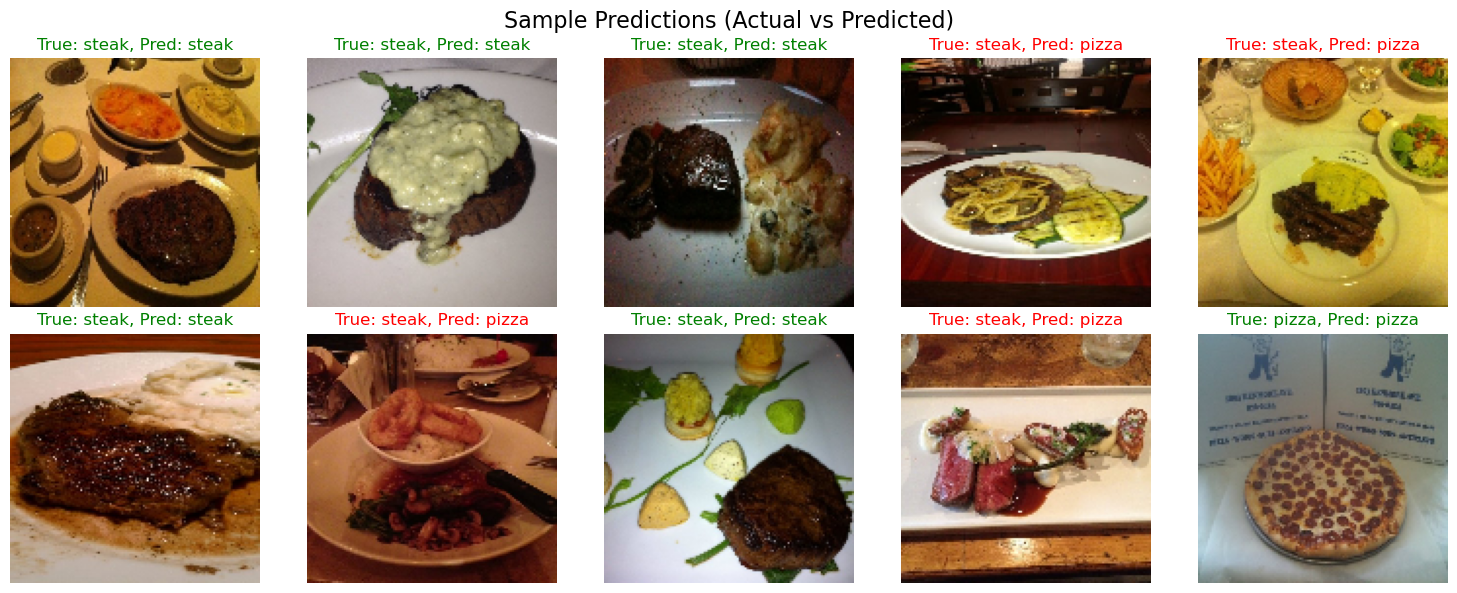

In [6]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_dir = "data/pizza_steak_sushi"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image dimensions - adjust as needed for your model
img_height = 128
img_width = 128

X_train_img, y_train_labels = load_images_from_folder(train_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])
X_test_img, y_test_labels = load_images_from_folder(test_dir, (img_height, img_width), classes_to_use=['pizza', 'steak'])

# Convert string labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)

# Display some example images
plt_i = 0
plt.figure(figsize=(12, 8))
for i in range(int(len(y_train_encoded)/2) - 5, int(len(y_train_encoded)/2) + 3): 
    plt.subplot(2, 4, plt_i+1)
    # Display the unnormalized image for better visualization
    img = X_train_img[i].copy()
    # Reverse preprocessing for display
    img = img / 256  # Approximate reverse of preprocessing
    plt.imshow(img)
    plt.title(f"Class: {label_encoder.classes_[y_train_encoded[i]]}")
    plt.axis('off')
    plt_i += 1
plt.tight_layout()
plt.show()

# Build the 2D CNN model (with L2 regularization)
def create_2d_cnn_model(input_shape):
    
    model = Sequential([
        # First convolutional block
        Conv2D(32, kernel_size=(3, 3), activation='relu', 
               input_shape=input_shape, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Third convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu', 
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        # Dense layers
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
    ])
    
    # Add learning rate reduction when plateauing
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.000005
    )
    
    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        start_from_epoch = 20
    )

    # Compile with binary crossentropy loss
    model.compile(
        optimizer=Adam(learning_rate=0.00005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model, [reduce_lr, early_stopping]


# Data augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# split the data into train and val
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_train_img, y_train_encoded, test_size=0.2, random_state=42
)

# Create and train the 2D CNN model
cnn_2d_model, callbacks = create_2d_cnn_model((img_height, img_width, 3))
history = cnn_2d_model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=100,
    batch_size=32,
    validation_data=datagen.flow(X_val, y_val_encoded, batch_size=32),
    verbose=1,
    callbacks=callbacks
)

# Plot the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the 2D CNN model
y_pred_proba = cnn_2d_model.predict(X_test_img)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("2D CNN Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions (Actual vs Predicted)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    idx = i + 10  # Skip the first few for variety
    ax.imshow(X_test_img[idx].reshape(img_height, img_width, 3) / 256)
    pred_class = int(y_pred[idx])
    true_class = int(y_test_encoded[idx])
    
    color = 'green' if pred_class == true_class else 'red'
    ax.set_title(f"True: {label_encoder.classes_[true_class]}, Pred: {label_encoder.classes_[pred_class]}", color=color)
    ax.axis('off')

# set first axis to logy
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()